# a)


In [123]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
from sklearn import model_selection,preprocessing, metrics

from grafica import *
from ClassNeuronaLineal import NeuronaLineal

In [124]:
datos= pd.read_csv('../../Datos/automobile-simple.csv')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          205 non-null    object 
 1   fuel-type     205 non-null    object 
 2   num-of-doors  203 non-null    object 
 3   body-style    205 non-null    object 
 4   curb-weight   205 non-null    int64  
 5   engine-size   205 non-null    int64  
 6   horsepower    203 non-null    float64
 7   city-mpg      205 non-null    int64  
 8   highway-mpg   205 non-null    int64  
 9   price         201 non-null    float64
 10  volume        205 non-null    float64
 11  eco-rating    205 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 19.3+ KB


In [125]:
print(datos.sample(15))
print(datos['price'].isna().sum())

            make fuel-type num-of-doors   body-style  curb-weight  \
57         mazda       gas          two    hatchback         2385   
5           audi       gas          two        sedan         2507   
150       toyota       gas          two    hatchback         1985   
136         saab       gas          two    hatchback         2808   
0    alfa-romero       gas          two  convertible         2548   
31         honda       gas          two    hatchback         1819   
165       toyota       gas          two        sedan         2265   
82    mitsubishi       gas          two    hatchback         2833   
23         dodge       gas          two    hatchback         2128   
134         saab       gas          two    hatchback         2707   
24         dodge       gas         four    hatchback         1967   
43         isuzu       gas         four        sedan         2337   
75       mercury       gas          two    hatchback         2910   
95        nissan       gas        

In [126]:
price_promedio = datos["price"].mean()
print(price_promedio)

13207.129353233831


In [127]:
datos["price"] = datos["price"].fillna(price_promedio)
print(datos['price'].isna().sum())

0


In [128]:
T = np.array(datos['price'])
X = np.array(datos['engine-size'])
X = X.reshape(-1,1)
T = T.reshape(-1,1)



In [129]:
normalizar = 1
if normalizar:
    normalizador= preprocessing.MinMaxScaler()
    #normalizador= preprocessing.StandardScaler() #media y desvío
    X = normalizador.fit_transform(X)
    T = normalizador.fit_transform(T)
    
print(X)
print(T)

[[0.26037736]
 [0.26037736]
 [0.34339623]
 [0.18113208]
 [0.28301887]
 [0.28301887]
 [0.28301887]
 [0.28301887]
 [0.26415094]
 [0.26415094]
 [0.17735849]
 [0.17735849]
 [0.38867925]
 [0.38867925]
 [0.38867925]
 [0.55849057]
 [0.55849057]
 [0.55849057]
 [0.        ]
 [0.10943396]
 [0.10943396]
 [0.10943396]
 [0.10943396]
 [0.13962264]
 [0.10943396]
 [0.10943396]
 [0.10943396]
 [0.13962264]
 [0.23018868]
 [0.35849057]
 [0.11698113]
 [0.11698113]
 [0.06792453]
 [0.11698113]
 [0.11698113]
 [0.11698113]
 [0.11698113]
 [0.18490566]
 [0.18490566]
 [0.18490566]
 [0.18490566]
 [0.18490566]
 [0.18490566]
 [0.18867925]
 [0.10943396]
 [0.10943396]
 [0.21886792]
 [0.74339623]
 [0.74339623]
 [1.        ]
 [0.11320755]
 [0.11320755]
 [0.11320755]
 [0.11320755]
 [0.11320755]
 [0.03396226]
 [0.03396226]
 [0.03396226]
 [0.07169811]
 [0.23018868]
 [0.23018868]
 [0.23018868]
 [0.23018868]
 [0.23018868]
 [0.23018868]
 [0.29811321]
 [0.2754717 ]
 [0.46037736]
 [0.46037736]
 [0.46037736]
 [0.46037736]
 [0.65

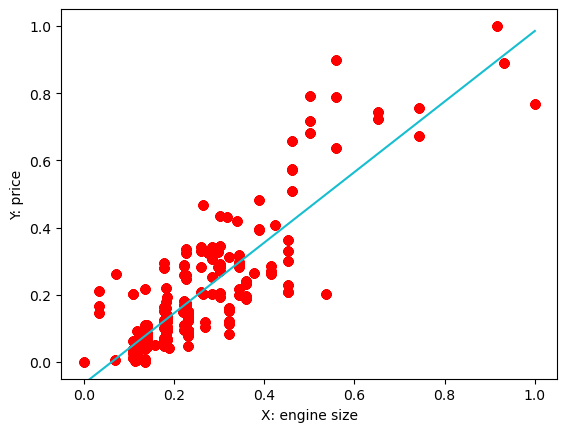

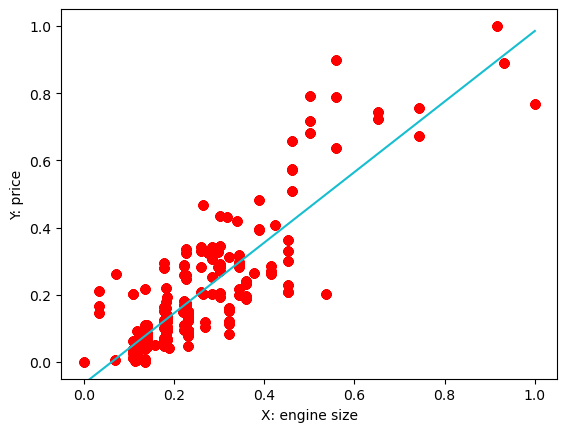

In [130]:
nl = NeuronaLineal(alpha=0.02, n_iter=50, cotaE=10e-05, draw=1, title=['X: engine size', 'Y: price'])
# --- utilice random_state=None para que los pesos se inicializacen en forma aleatoria --
nl.fit(X, T)

In [131]:
print("W = ", nl.w_)
print("b = ", nl.b_)

W =  [1.04969517]
b =  [-0.06464091]


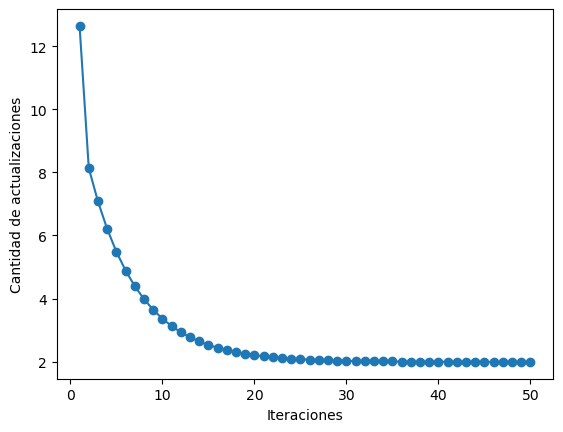

In [132]:
plt.plot(range(1, len(nl.errors_) + 1), nl.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

# Conclusiones:
- sin normalizar los números de actualizaciones crecían a medida que avanzábamos en las iteraciones. La recta obtenida no fue representativa
- al normalizar entre 0 y 1 la gráfica fue más o menos representativa y cada vez el modelo hacía menos actualizaciones. Parece que no modifica bien la pendiente, solo la ordenada al origen
- al normalizar con la media y desvío parece que tuve los mejores resultados

In [133]:
w = nl.w_
b = nl.b_

sumaError = 0

# Recorremos el DataFrame usando `iterrows()` que da acceso a cada fila como una serie
for index, row in datos.iterrows():
    hora = row["engine-size"]
    tiempo = row["price"]
    tiempo_predicho = w * hora + b
    sumaError += abs(tiempo - tiempo_predicho)

# Calculamos el promedio del error cuadrático
print(sumaError / len(datos))

[13073.97999653]


In [136]:
print("pesos finales")

# for i in range(11):
#     print(datos.columns[i], "W = ", nl.w_[i])#esto muestra los pesos finales
# print("b = ", nl.b_)
print(nl.w_)
print(datos.columns)

pesos finales
[1.04969517]
Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'curb-weight',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price',
       'volume', 'eco-rating'],
      dtype='object')


In [138]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          205 non-null    object 
 1   fuel-type     205 non-null    object 
 2   num-of-doors  203 non-null    object 
 3   body-style    205 non-null    object 
 4   curb-weight   205 non-null    int64  
 5   engine-size   205 non-null    int64  
 6   horsepower    203 non-null    float64
 7   city-mpg      205 non-null    int64  
 8   highway-mpg   205 non-null    int64  
 9   price         205 non-null    float64
 10  volume        205 non-null    float64
 11  eco-rating    205 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 19.3+ KB


In [141]:
datos = datos.drop(columns=['make', 'fuel-type', 'num-of-doors', 'body-style'])
datos.corr()

,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
curb-weight,1.000000,0.850594,0.751034,-0.757414,-0.797465,0.820825,0.819806,-0.842111
engine-size,0.850594,1.000000,0.810773,-0.653658,-0.677470,0.861752,0.594351,-0.719602
horsepower,0.751034,0.810773,1.000000,-0.803620,-0.770908,0.758714,0.429840,-0.816182
city-mpg,-0.757414,-0.653658,-0.803620,1.000000,0.971337,-0.667449,-0.550292,0.977349
highway-mpg,-0.797465,-0.677470,-0.770908,0.971337,1.000000,-0.690526,-0.602410,0.983781
price,0.820825,0.861752,0.758714,-0.667449,-0.690526,1.000000,0.623298,-0.725885
volume,0.819806,0.594351,0.429840,-0.550292,-0.602410,0.623298,1.000000,-0.593856
eco-rating,-0.842111,-0.719602,-0.816182,0.977349,0.983781,-0.725885,-0.593856,1.000000
